### Example

* Suppose we have two samples that represent biki ride durations for two distinct neighborhoods `a` and `b`

1. Instead of working with actual data, sample the data from a gaussian the same mean ($\mu=20$) the same same standard deviation ($\sigma = 4$)
    * We will sample 15 bike rides for each of regions `a` and `b`


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
np.random.seed(0)
a = np.random.normal(20, 4, 15)
b = np.random.normal(20, 4, 15)

In [3]:
a_mean = np.mean(a)
b_mean = np.mean(b)
mean_diff = abs(a_mean - b_mean)
mean_diff

1.953214960453245

### Example - cont'd

2. Compute and compare the means of datasets `a` `b`
  * Based on the observed difference between the means, do you believe there is a statistically significant difference between samples `a` and `b`

Based on the observed difference in the means of trial a and trial b, it appears as if there is no significant difference.

### Example - cont'd

3. draw the two KDEs reprenting the datasets `a` and `b`
  * You should have a figure that appears "approximately" as in the figure below
    * The X- and Y-axis values have been intentionally omitted
    
![](https://www.dropbox.com/s/0ab4d92lkcn89jv/a_b_kde_exmaple.png?dl=1)    

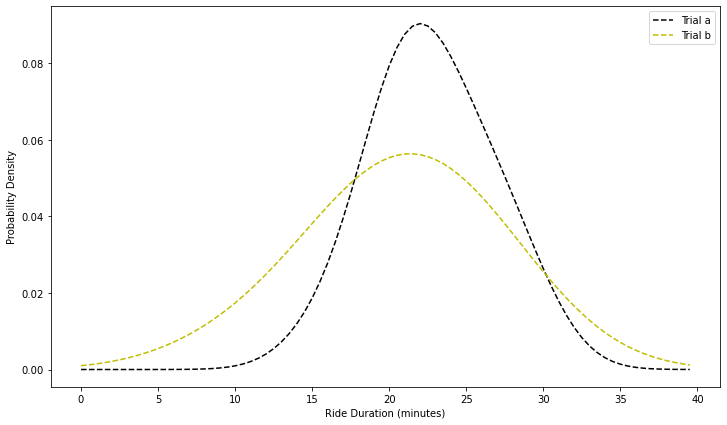

In [4]:
kde_a = stats.gaussian_kde(a, bw_method=0.8)
kde_b = stats.gaussian_kde(b, bw_method=1)

x_vals = np.arange(0, 40, 0.5)

density_a = kde_a.evaluate(x_vals)
density_b = kde_b.evaluate(x_vals)

plt.figure(figsize=(12,7))
plt.plot(x_vals, density_a, '--k', label='Trial a')
plt.plot(x_vals, density_b, '--y', label='Trial b')
plt.ylabel('Probability Density')
plt.xlabel('Ride Duration (minutes)')
plt.legend()

### Example - cont'd

4. Visually, does dataset *a* differ significantly from dataset `b`

Yes, the datasets visually appear different. Trial A appears to have more values within on standard deviation of the mean whereas the
probability distribution of B is wider, having more values within 2 standard deviations of the mean.

### Example - cont'd

5. Use the resampling method covered in class to test whether or not there is a statistically significant difference between datasets `a` and `b`
 * Provide a p-value to support your claim.


In [5]:
concat_data = np.concatenate([a,b])
mean_diff = []

for _ in range(1000):
    np.random.shuffle(concat_data)
    subset_a = concat_data[:15]
    subset_b = concat_data[15:]
    mean_diff.append(np.mean(subset_a) - np.mean(subset_b))

p_val = sum(mean_diff >= (np.mean(a) - np.mean(b))) / len(mean_diff)
p_val

0.118

### Example - cont'd

6. Plot a histogram of the means obtained during resampling and the observed value. 
  * You should have a figure that appears "approximately" as in the figure below
![](https://www.dropbox.com/s/g54bal23o1ktj2j/a_b_hist_example.png?dl=1)  

Text(0, 0.5, 'Probability')

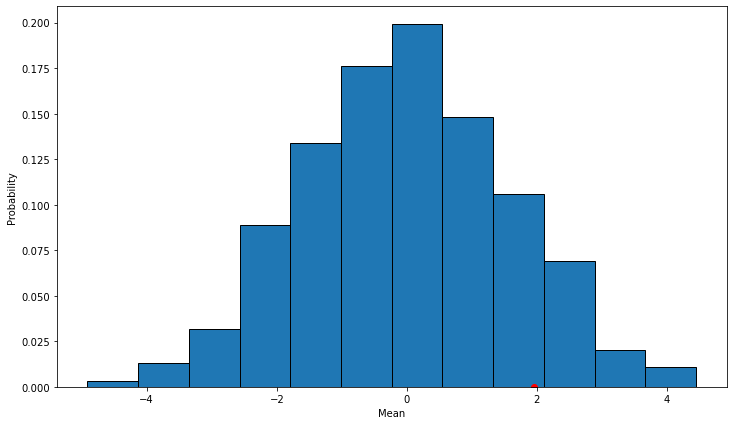

In [6]:
plt.figure(figsize=(12,7))
plt.hist(mean_diff, bins=12, edgecolor='k', weights=np.ones_like(mean_diff) / len(mean_diff))
plt.scatter(np.mean(a) - np.mean(b), 0, color='red')
plt.xlabel('Mean')
plt.ylabel('Probability')